In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def gaussian(x,mu,var):
    return np.exp(-(x-mu)**2/(2*var))/(np.sqrt(2*np.pi*np.sqrt(var)))

In [3]:
a=np.random.normal(50, 10, 1000)
b=np.random.normal(100, 25, 800)
c=np.append(a,b)

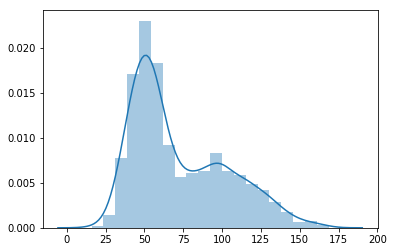

In [4]:
sns.distplot(c)

In [13]:
mu1=30
mu2=50
var1=200
var2=500

In [14]:
for i in range(100):
    #E Step
    t1=gaussian(c,mu1,var1)
    t2=gaussian(c,mu2,var2)
    summ=t1+t2
    t1=t1/summ
    t2=t2/summ
    
    #M Step
    mu1=np.sum(t1*c)/np.sum(t1)
    mu2=np.sum(t2*c)/np.sum(t2)
    var1=np.sum(t1*(c-mu1)**2)/np.sum(t1)
    var2=np.sum(t2*(c-mu2)**2)/np.sum(t2)

In [29]:
newa=np.random.normal(mu1, np.sqrt(var1), size=1000)
newb=np.random.normal(mu2, np.sqrt(var2), size=800)
newc=np.append(newa,newb)

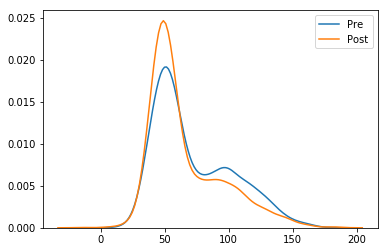

In [31]:
sns.kdeplot(c,label='Pre')
sns.kdeplot(newc,label='Post')
plt.show()